<a href="https://colab.research.google.com/github/falwa-alkhalifah/Mining-project/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif

In [50]:
df = pd.read_csv("Dataset of Diabetes .csv")

In [51]:
#This code converts categorical data into numbers using Label Encoding.
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['CLASS'] = le.fit_transform(df['CLASS'])
print(df)

      ID  No_Pation  Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0    502      17975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1    735      34221       1   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2    420      47975       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3    680      87656       0   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4    504      34223       1   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   
..   ...        ...     ...  ...   ...  ..    ...   ...  ...  ...  ...   ...   
995  200     454317       1   71  11.0  97    7.0   7.5  1.7  1.2  1.8   0.6   
996  671     876534       1   31   3.0  60   12.3   4.1  2.2  0.7  2.4  15.4   
997  669      87654       1   30   7.1  81    6.7   4.1  1.1  1.2  2.4   8.1   
998   99      24004       1   38   5.8  59    6.7   5.3  2.0  1.6  2.9  14.0   
999  248      24054       1   54   5.0  67    6.9   3.8  1.7  1.1  3.0   0.7   

      BMI  CLASS  
0    24.0      0  
1

In [52]:
#select top 5 important features for classification.
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['CLASS'] = LabelEncoder().fit_transform(df['CLASS'])

X = df.drop(columns=["CLASS"])
X = X.select_dtypes(include=["number"])
y = df['CLASS']

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['AGE', 'HbA1c', 'Chol', 'TG', 'BMI']


In [53]:
#remove features with low variance (less than 0.1).
selector = VarianceThreshold(threshold=0.1)
X_new = selector.fit_transform(X)

selected_features = X.columns[selector.get_support()]
print("Selected Features after Variance Threshold:", selected_features.tolist())

Selected Features after Variance Threshold: ['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


First split: 70% for training, 30% for testing.

Decision Tree (Gini Index):
Accuracy: 0.9766666666666667
[[ 35   0   1   0]
 [  0  10   0   0]
 [  2   1 248   2]
 [  0   0   1   0]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        36
           2       0.91      1.00      0.95        10
           3       0.99      0.98      0.99       253
           4       0.00      0.00      0.00         1

    accuracy                           0.98       300
   macro avg       0.71      0.74      0.72       300
weighted avg       0.98      0.98      0.98       300


Decision Tree (Entropy - Information Gain):
Accuracy: 0.9833333333333333
[[ 35   0   1   0]
 [  0  10   0   0]
 [  1   0 250   2]
 [  0   0   1   0]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           2       1.00      1.00      1.00        10
           3       0.99      0.99      0.99       253
           4       0.00      0.00      0.00         1

    accu

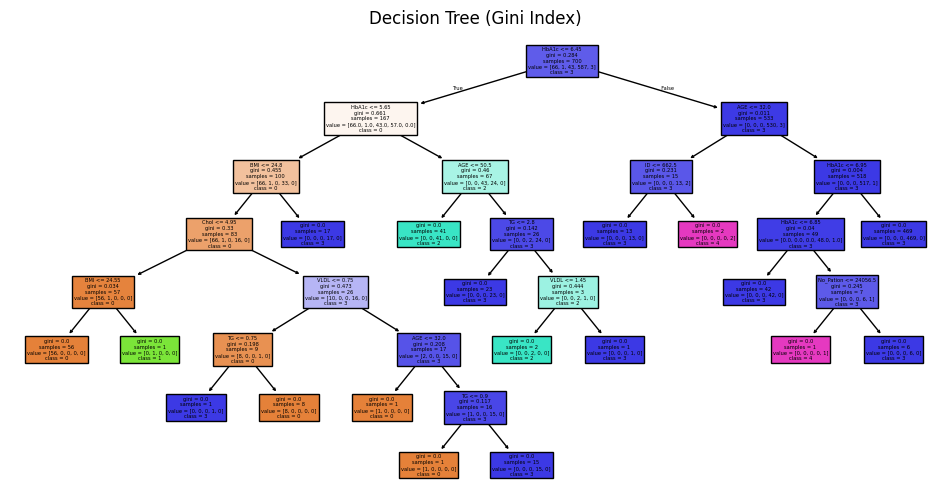

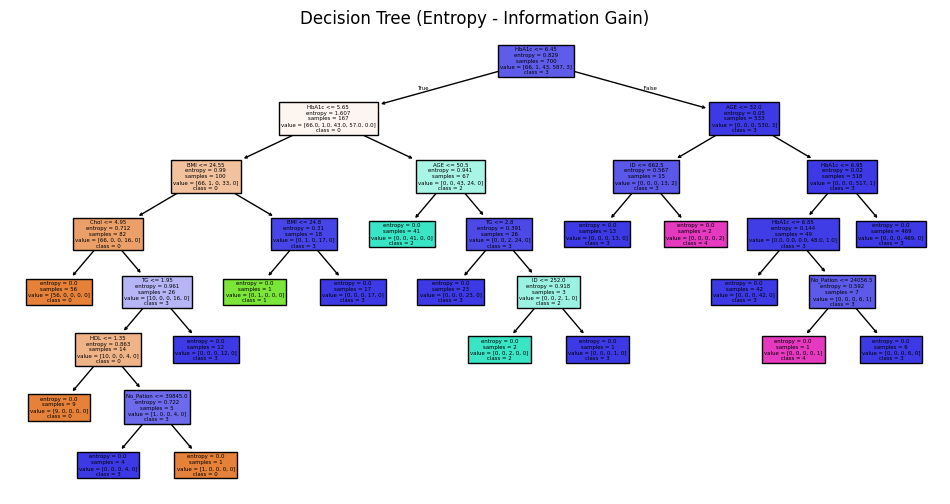

In [54]:
#splits the data (70% for training, 30% for testing), trains and compares two Decision Tree classifiers,
#one using Gini Index and the other using Entropy (Information Gain), then evaluates their accuracy and visualizes the trees.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
dt_gini.fit(X_train, y_train)

dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

print("Decision Tree (Gini Index):")
print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print(confusion_matrix(y_test, y_pred_gini))
print(classification_report(y_test, y_pred_gini))

print("\nDecision Tree (Entropy - Information Gain):")
print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print(confusion_matrix(y_test, y_pred_entropy))
print(classification_report(y_test, y_pred_entropy))

plt.figure(figsize=(12, 6))
# Convert class labels to strings for visualization
class_names = [str(label) for label in df['CLASS'].unique()]
tree.plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Decision Tree (Gini Index)")
plt.show()

plt.figure(figsize=(12, 6))
tree.plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=class_names)
plt.title("Decision Tree (Entropy - Information Gain)")
plt.show()

Second split: 80% training, 20% testing.

Third split: 90% training, 10% testing.